In [16]:
%run ../utils/configuration.ipynb

In [17]:
%run ./0300_common_functions.ipynb

In [18]:
df=pd.read_parquet(train_model_path) 

In [19]:
df_1 = apply_feature_selection(df, 1)
df_1.head()

,churn_value,number_of_referrals,contract,monthly_charge,age,number_of_dependents
0,1,0,1,20.35,62,0
1,1,5,1,99.85,58,0
2,0,0,1,54.25,41,0
3,0,0,1,64.95,40,0
4,0,6,1,55.55,30,1


In [20]:
#4 Yes across all methods
df_2 = apply_feature_selection(df, 2)
df_2.head()

,churn_value,number_of_referrals,offer,online_security,online_backup,premium_tech_support,contract,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_revenue,age,number_of_dependents,population
0,1,0,5,0,0,0,1,1,20.35,33.2,0.0,97.26,62,0,1201
1,1,5,5,0,1,1,1,0,99.85,990.9,0.0,1423.70,58,0,24194
2,0,0,4,0,0,1,1,0,54.25,583.0,0.0,712.60,41,0,47689
3,0,0,5,1,0,1,1,0,64.95,547.8,0.0,795.57,40,0,9063
4,0,6,5,0,1,0,1,0,55.55,551.3,0.0,608.70,30,1,433


In [21]:
df_3 = apply_feature_selection(df, 3)
df_3.head()

,churn_value,number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,avg_monthly_gb_download,online_security,online_backup,premium_tech_support,streaming_music,contract,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_revenue,age,number_of_dependents,population
0,1,0,5,1,32.03,0,0,0,0,0,1,0,1,20.35,33.2,0.0,97.26,62,0,1201
1,1,5,5,1,43.28,12,0,1,1,1,1,0,0,99.85,990.9,0.0,1423.70,58,0,24194
2,0,0,4,1,12.96,29,0,0,1,0,1,0,0,54.25,583.0,0.0,712.60,41,0,47689
3,0,0,5,1,27.53,11,1,0,1,1,1,1,0,64.95,547.8,0.0,795.57,40,0,9063
4,0,6,5,1,5.74,59,0,1,0,0,1,1,0,55.55,551.3,0.0,608.70,30,1,433


In [22]:
model_DT = DecisionTreeClassifier(max_depth = 3, random_state = 99)

In [23]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['DT'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_1,f1_score, model_DT))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_1,precision_score, model_DT))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
DT,0.466+/-0.1299,0.461+/-0.1357


precision_score
------------------------------------------


,Train,Validation
DT,0.764+/-0.1079,0.748+/-0.096


In [9]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['DT'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_2,f1_score, model_DT))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_2,precision_score, model_DT))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
DT,0.466+/-0.1299,0.461+/-0.1357


precision_score
------------------------------------------


,Train,Validation
DT,0.764+/-0.1079,0.748+/-0.096


In [10]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['DT'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_3,f1_score, model_DT))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_3,precision_score, model_DT))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
DT,0.466+/-0.1299,0.461+/-0.1357


precision_score
------------------------------------------


,Train,Validation
DT,0.764+/-0.1079,0.748+/-0.096


Model Optimization

In [11]:
def point_plot(train, validation, values_try):
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.legend()

In [12]:
def get_models_dt(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models['depth_' + str(value)] = DecisionTreeClassifier(max_depth = value, random_state = 99)

    for name, model in models.items():
        train_results, val_results  = select_best_models(data, model)
        avg_train, std_train, avg_val, std_val = apply_score(train_results, val_results, f1_score)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val

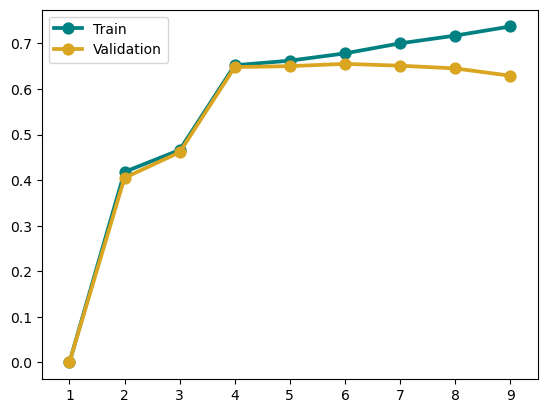

In [13]:
values_try = [1,2,3,4,5,6,7,8,9]
results_train, results_val = get_models_dt(df_1, values_try)
point_plot(results_train, results_val, values_try)

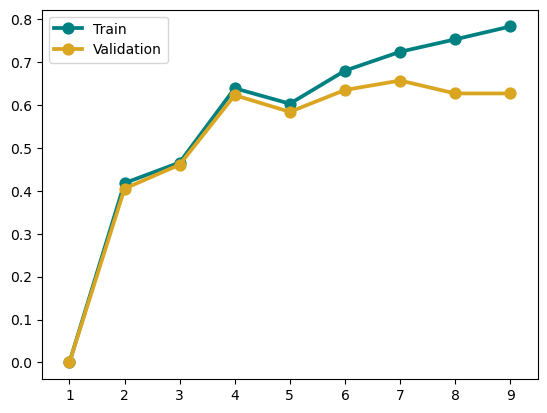

In [14]:
values_try = [1,2,3,4,5,6,7,8,9]
results_train, results_val = get_models_dt(df_2, values_try)
point_plot(results_train, results_val, values_try)

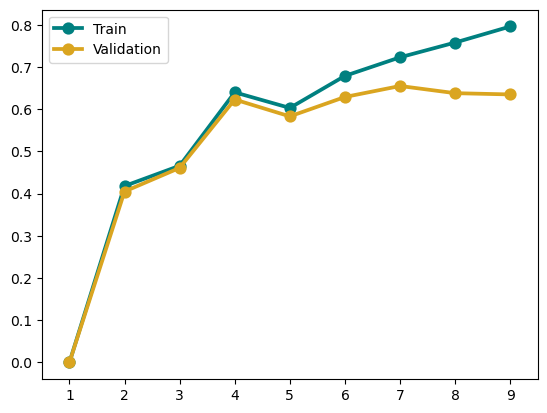

In [15]:
values_try = [1,2,3,4,5,6,7,8,9]
results_train, results_val = get_models_dt(df_3, values_try)
point_plot(results_train, results_val, values_try)